<a href="https://colab.research.google.com/github/rylan-berry/DataScienceExercises2025-2026/blob/main/Rylans_Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.2 MB/s eta 0:00:00


In [6]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import bambi as bmb

In [7]:
import graphviz as gv

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

*There isn't any meaningful meaning when only calculating the elpd_loo for a model by itself. You get much more information about the preformance of a model when there's multiple models to comapare--given they are trying to model the same thing.*

**Task2**:

Describe overfitting, in the context of this course

*Overfitting is when the model preforms well on the provided data, but it specifies to the data so much that it doesn't capture the generalization that's meant to be modeled.*

**Task3**:

How do we mitigate overfitting?

*Poorly informed priors are an effective way to mitigate overfitting, allowing a model to explore a variety of different solutions. Even minimizing the variables given to a model can mitigate overfitting.*

**Task4**:

How do we mitigate underfitting?

*However, there's a point where to little is to a detiment, it results in your model being to simplistic and no longer capturing a neuanced picture.*

**Task5**:

Why would we want more than one predictor in a model?

*In most real world scenarios, there's rarely only one factor at play in an outcome, so even having only two predictors can vastly out preform a single variable model.*

**Task6**:

Can we have too many predictors? How would we know?

*There is some data that can just be considered noise, meaning that there's minimal effect on the outcome of the model by including it. You can usually see this when comparing a model that has these noisy variable and one that lacks them,  if the former performs with equal or worse performance than the latter, then those variables are either doing nothing for the model, or are clogging the model with non-useful data.*

**Task7**:

What is variable selection, and how does it work?

*This is the process where you decide which variables are meaningful to a model and could actually impact your model. This can be done through a causal diagram, where you graph the relationships between variables--what causes the other.*

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

*The first model will result in the same slope across the different categorical models. The second will result in completely different 'lines' for each position. While the third does create different lines, it also allows each one to effect the other.*

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

*It starts with a standard linear graph (one of the inputs vs the output), then, for an additional input, you can have multiple lines for each type of a given input (displaying each of the categories of a given input). Another option for an additional inputs could be making a 3D graph for a second continuous input, could also add some form of colorizing to a graph (white to a full color to display a ranged input). The last thing I can think of is multiple graphs for different input categories, this would likely work worse for continuous variables or infinite possibility variables, but each graph could be for particular combination of inputs, so given slices of a 4d representation with each slice being determined by combinations of other variables. While the later allows us to visualize much higher input combinations, the larger the more impractical and confusing it becomes.*



**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [3]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv'
    ).dropna()

In [8]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['G'].plot(kind='hist', bins=20, title='G')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['GS'].plot(kind='hist', bins=20, title='GS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Pos').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Age', y='G', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='G', y='GS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='GS', y='MP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pos')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pos', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['G']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pos')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pos', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('G')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['GS']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pos')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pos', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('GS')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['MP']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pos')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pos', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('MP')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['G'].plot(kind='line', figsize=(8, 4), title='G')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['GS'].plot(kind='line', figsize=(8, 4), title='GS')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Pos'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Pos', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Pos'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Age', y='Pos', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Pos'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='G', y='Pos', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Pos'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='GS', y='Pos', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
model_ftppos_cat = bmb.Model("FGp ~ FTp + Pos", bb, family = "negativebinomial")
idata_ftppos_cat = model_ftppos_cat.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_ftppos_hier = bmb.Model("FGp ~ (FTp|Pos)", bb, family = "negativebinomial")
idata_ftppos_heir = model_ftppos_hier.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_ftppos_inter = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", bb, family = "negativebinomial")
idata_ftppos_inter = model_ftppos_inter.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_ftppos_ftppos3pa = bmb.Model("FGp ~ FTp + Pos + '3PA' + '3PA':FTp + Pos:'3PA' + Pos:FTp", bb, family = "negativebinomial")
idata_ftppos_ftppos3pa = model_ftppos_ftppos3pa.fit(idata_kwargs={"log_likelihood":True})

In [ ]:
model_ftppos_ftppos3pa_r = bmb.Model("FGp ~ FTp + Pos + '3PA' + Pos:'3PA'", bb, family = "negativebinomial")
idata_ftppos_ftppos3pa_r = model_ftppos_ftppos3pa_r.fit(idata_kwargs={"log_likelihood":True})

In [26]:
cmp = az.compare({
    'ftp pos (cat)':idata_ftppos_cat,
    'ftp pos (heir)':idata_ftppos_heir,
    'ftp pos interaction':idata_ftppos_inter,
    'ftp pos 3pa':idata_ftppos_ftppos3pa,
    'ftp pos:3pa inter':idata_ftppos_ftppos3pa_r})
cmp

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:797: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
ftp pos (cat),0,-0.065382,0.009519,0.000000,0.503617,0.009875,0.000000,True,log
ftp pos interaction,1,-0.066468,0.008644,0.001086,0.496383,0.007950,0.005564,True,log
ftp pos 3pa,2,-0.152486,0.078938,0.087103,0.000000,0.058033,0.057663,True,log
ftp pos:3pa inter,3,-0.213373,0.139762,0.147991,0.000000,0.086131,0.084544,True,log
ftp pos (heir),4,-0.333707,0.005506,0.268325,0.000000,0.006400,0.008311,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

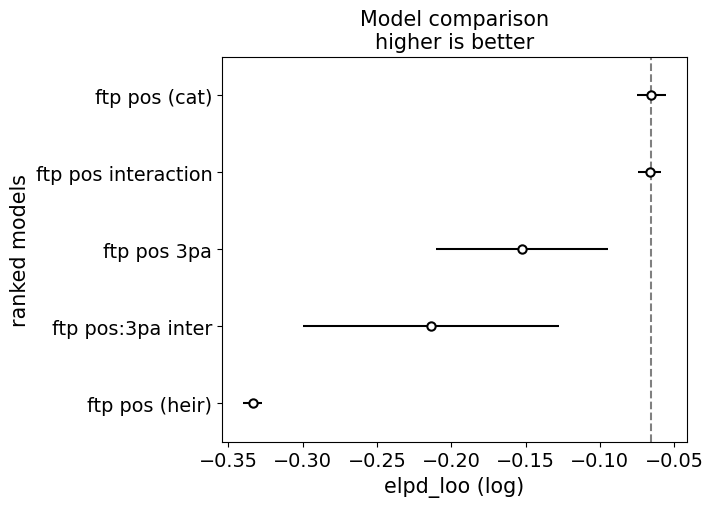

In [27]:
az.plot_compare(cmp)

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

*The better models (according to this metric) is between both of the FT% and Position categorical models (the one with the interaction and the one without). If I had to guess it's because these two are the most important variables in predicting FG%, and 3PA is simply noise, resulting in a lower epld_loo.*

**Task12:**

The body data set has a measure of body fat percentage (siri), as well as several other measurments of other parts of a person's body, plus their age.

Create a sensible causal diagram for this set of variables.

Based on your causal diagram, which variable should you try to predict? Why?

In [28]:
body = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/body_fat.csv')

In [29]:
body.head()

,siri,age,weight,height,abdomen,thigh,wrist
0,12.3,23,70.1,172,85.2,59.0,17.1
1,6.1,22,78.8,184,83.0,58.7,18.2
2,25.3,22,70.0,168,87.9,59.6,16.6
3,10.4,26,84.0,184,86.4,60.1,18.2
4,28.7,24,83.8,181,100.0,63.2,17.7


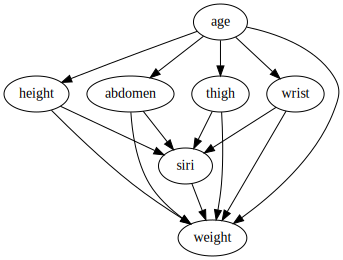

In [39]:
b_dag = gv.Digraph(name="Bodies DAG")

b_dag.node('S','siri')
b_dag.node('A','age')
b_dag.node('W','weight')
b_dag.node('H','height')
b_dag.node('B','abdomen')
b_dag.node('T','thigh')
b_dag.node('R','wrist')

b_dag.edges(['AW', 'AH', 'HS', 'SW', 'AB', 'AT', 'AR', 'BS', 'TS', 'RS', 'BW', 'TW', 'RW', 'HW'])

b_dag

*Since most of the variables in some way effect the weight, I think a model would best function by calculating weight.*